## Desription

-  Images are categorized based on the emotion shown in the facial expressions (happiness, neutral, sadness, anger, surprise, disgust, fear).
-  We need to design a CNN which will classify images based on followinf facial expression 

In [8]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

# defining dir variables 
root_dir = './data/'
train_dir = root_dir + 'train/'
test_dir = root_dir + 'test/'

##### Target labels in dataset

In [9]:
target_var = os.listdir(train_dir)
target_var

['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']

##### Sample Images

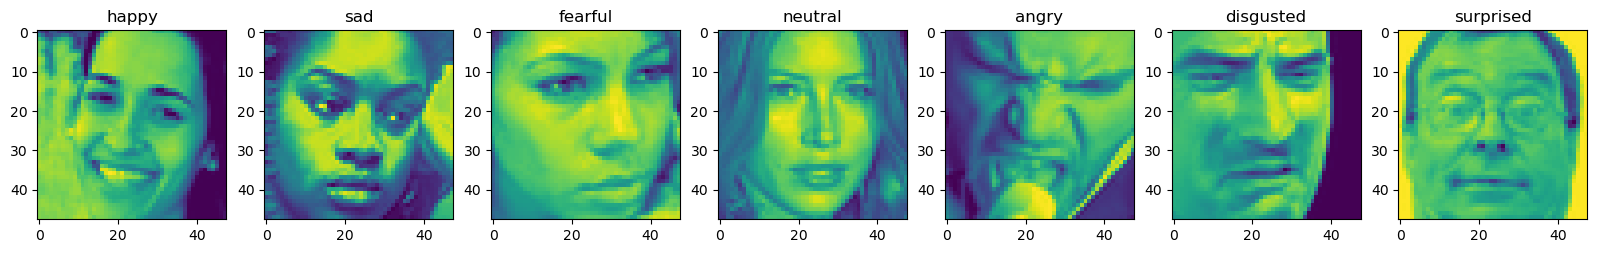

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 7, figsize=(20,8))
for i in range(len(target_var)):
    d = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[0]
    axes[i].imshow( plt.imread(d) )
    axes[i].set_title(target_var[i])
plt.show()

##### EDA

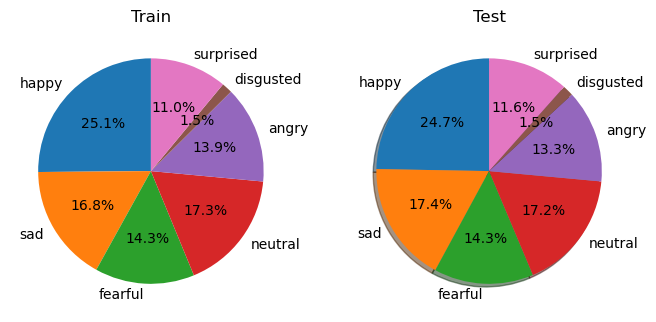

Emotion : happy
	Training : 7215
	 Testing : 1774
Emotion : sad
	Training : 4830
	 Testing : 1247
Emotion : fearful
	Training : 4097
	 Testing : 1024
Emotion : neutral
	Training : 4965
	 Testing : 1233
Emotion : angry
	Training : 3995
	 Testing : 958
Emotion : disgusted
	Training : 436
	 Testing : 111
Emotion : surprised
	Training : 3171
	 Testing : 831


In [16]:
x_train = np.array([ len(os.listdir(train_dir+i+'/')) for i in target_var ])
x_test = np.array([ len(os.listdir(test_dir+i+'/')) for i in target_var ])
label = target_var
  
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%', startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

for i in target_var:
    print('Emotion : ' + i )
    print('\tTraining : ' + str(len(os.listdir(train_dir+i+'/'))) +'\n\t Testing : ' + str(len(os.listdir(test_dir+i+'/'))))


In [20]:
train_count = {expression: len(os.listdir(os.path.join(train_dir, expression))) 
                for expression in os.listdir(train_dir)}
train_count_df = pd.DataFrame(train_count, index=['train'])

test_count = {expression: len(os.listdir(os.path.join(test_dir, expression))) 
               for expression in os.listdir(test_dir)}
test_count_df = pd.DataFrame(test_count, index=['test'])

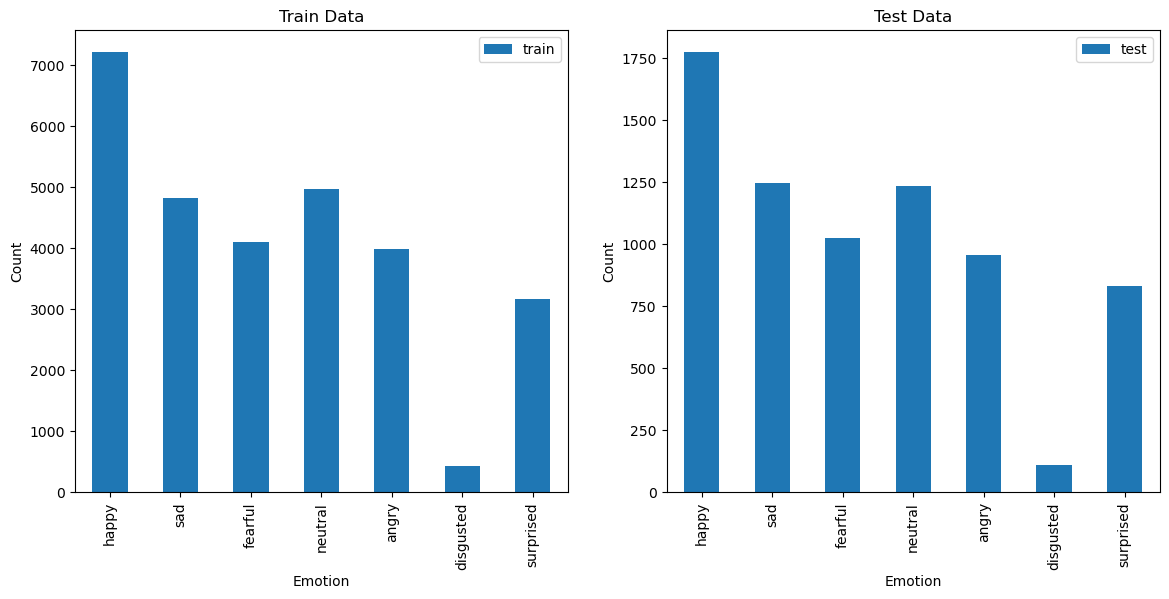

In [22]:
# Plotting data distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
train_count_df.transpose().plot(kind='bar', ax=plt.gca())
plt.title('Train Data')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
test_count_df.transpose().plot(kind='bar', ax=plt.gca())
plt.title('Test Data')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

- Male and Females Count.

In [5]:
from transformers import pipeline
# from transformers import ViTImageProcessor, ViTForImageClassification

genderClassificationModel = pipeline(task="image-classification", model="rizvandwiki/gender-classification")

#read image
# sample_img_path = train_dir+target_var[0]+'/'+os.listdir(train_dir+target_var[0]+'/')[0]
# sample_img = plt.imread(sample_img_path)



In [6]:
genderClassificationModel

In [21]:
# #read image
print("YY::", target_var[0])
# print("XX::", os.listdir(train_dir+target_var[0]+'/').index("im987.png"))
sample_img_path = train_dir+target_var[0]+'/'+os.listdir(train_dir+target_var[0]+'/')[903]
sample_img = plt.imread(sample_img_path)

result = genderClassificationModel(sample_img_path)


YY:: happy


In [22]:
result

[{'label': 'male', 'score': 0.9831732511520386},
 {'label': 'female', 'score': 0.01682676002383232}]

In [26]:
#Train
trainMenCount = [0,0,0,0,0,0,0]
trainFemaleCount = [0,0,0,0,0,0,0]

#Happy
i=0
# print("::::",i,"::::::")
for j in range(len(os.listdir(train_dir+target_var[i]+'/'))):
# for j in range(200):
    print(j)
    imagePath = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[j]
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    else:
        print("ODDDD")
    
            
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [27]:
trainFemaleCount

[3945, 0, 0, 0, 0, 0, 0]

In [28]:
trainMenCount

[3270, 0, 0, 0, 0, 0, 0]

In [29]:
#Sad

i = 1
for j in range(len(os.listdir(train_dir+target_var[i]+'/'))):
    print(j)
    imagePath = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[j]
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [30]:
#fearful
i = 2
for j in range(len(os.listdir(train_dir+target_var[i]+'/'))):
    print(j)
    imagePath = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[j]
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [31]:
#neutral
i = 3
for j in range(len(os.listdir(train_dir+target_var[i]+'/'))):
    print(j)
    imagePath = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[j]
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [32]:
#angry
i = 4
for j in range(len(os.listdir(train_dir+target_var[i]+'/'))):
    print(j)
    imagePath = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[j]
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [33]:
# disgusted
i = 5
for j in range(len(os.listdir(train_dir+target_var[i]+'/'))):
    print(j)
    imagePath = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[j]
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [34]:
#surprised
i = 6
for j in range(len(os.listdir(train_dir+target_var[i]+'/'))):
    print(j)
    imagePath = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[j]
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            trainMenCount[i] = trainMenCount[i] + 1
        else:
            trainFemaleCount[i] = trainFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [35]:
trainMenCount

[3270, 2530, 2071, 3007, 2818, 246, 1576]

In [36]:
trainFemaleCount

[3945, 2300, 2026, 1958, 1177, 190, 1595]

In [38]:
#Test
testMenCount = [0,0,0,0,0,0,0]
testFemaleCount = [0,0,0,0,0,0,0]

#Happy
i=0
for j in range(len(os.listdir(test_dir+target_var[i]+'/'))):
    # print(j)
    imagePath = test_dir+target_var[i]+'/'+os.listdir(test_dir+target_var[i]+'/')[j]
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    else:
        print("ODDDD")


In [39]:
testMenCount

[835, 0, 0, 0, 0, 0, 0]

In [40]:
testFemaleCount

[939, 0, 0, 0, 0, 0, 0]

In [41]:
# sad 
i=1
for j in range(len(os.listdir(test_dir+target_var[i]+'/'))):
    print(j)
    imagePath = test_dir+target_var[i]+'/'+os.listdir(test_dir+target_var[i]+'/')[j]
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    else:
        print("ODDDD")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [42]:
# fearful 
i=2
for j in range(len(os.listdir(test_dir+target_var[i]+'/'))):
    print(j)
    imagePath = test_dir+target_var[i]+'/'+os.listdir(test_dir+target_var[i]+'/')[j]
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [43]:
# neutral
i=3
for j in range(len(os.listdir(test_dir+target_var[i]+'/'))):
    print(j)
    imagePath = test_dir+target_var[i]+'/'+os.listdir(test_dir+target_var[i]+'/')[j]
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [44]:
# angry
i=4
for j in range(len(os.listdir(test_dir+target_var[i]+'/'))):
    print(j)
    imagePath = test_dir+target_var[i]+'/'+os.listdir(test_dir+target_var[i]+'/')[j]
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [45]:
# disgusted
i=5
for j in range(len(os.listdir(test_dir+target_var[i]+'/'))):
    print(j)
    imagePath = test_dir+target_var[i]+'/'+os.listdir(test_dir+target_var[i]+'/')[j]
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110


In [46]:
# surprised
i=6
for j in range(len(os.listdir(test_dir+target_var[i]+'/'))):
    print(j)
    imagePath = test_dir+target_var[i]+'/'+os.listdir(test_dir+target_var[i]+'/')[j]
    result = genderClassificationModel(imagePath)
    if result[0]['score'] > 0.5:
        if result[0]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    elif result[1]['score'] > 0.5:
        if result[1]['label'] == "male":
            testMenCount[i] = testMenCount[i] + 1
        else:
            testFemaleCount[i] = testFemaleCount[i] + 1
    else:
        print("ODDDD")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [47]:
testMenCount

[835, 666, 499, 743, 662, 77, 446]

In [48]:
testFemaleCount

[939, 581, 525, 490, 296, 34, 385]

In [ ]:
plt.subplot(1, 2, 2)
test_counts_df.transpose().plot(kind='bar', ax=plt.gca())
plt.title('Test Data')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


Emotion : happy
	Training : 7215 - 3270 are male, 3945 are female
	 Testing : 1774 - 835 are male, 939 are female
Emotion : sad
	Training : 4830 - 2530 are male, 2300 are female
	 Testing : 1247 - 666 are male, 581 are female
Emotion : fearful
	Training : 4097 - 2071 are male, 2026 are female
	 Testing : 1024 - 499 are male, 525 are female
Emotion : neutral
	Training : 4965 - 3007 are male, 1958 are female
	 Testing : 1233 -  743 are male, 490 are female
Emotion : angry
	Training : 3995 - 2818 are male, 1177 are female
	 Testing : 958 - 662 are male, 296 are female
Emotion : disgusted
	Training : 436 - 246 are male, 190 are female
	 Testing : 111 - 77 are male, 34 are female
Emotion : surprised
	Training : 3171 - 1576 are male, 1595 are female
	 Testing : 831 - 446 are male, 385 are female

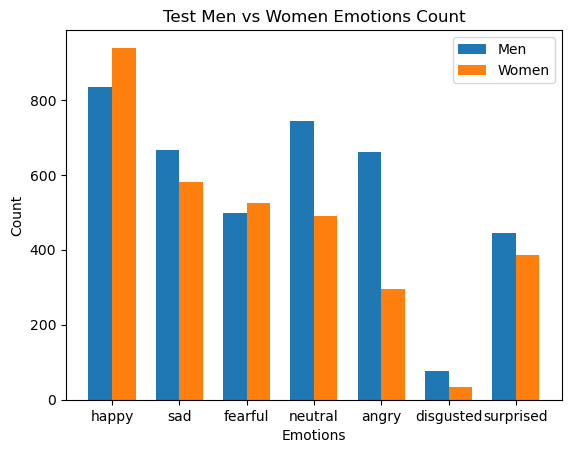

In [23]:
# Define the emotions labels
emotions = ['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']

# Define the test men and women count arrays
testMenCount = [835, 666, 499, 743, 662, 77, 446]
testFemaleCount = [939, 581, 525, 490, 296, 34, 385]

# Define the width of the bars
bar_width = 0.35

# Define the x-axis positions for the bars
x = range(len(emotions))

# Plotting the bars for test men count
plt.bar(x, testMenCount, width=bar_width, label='Men')

# Plotting the bars for test female count
plt.bar([i + bar_width for i in x], testFemaleCount, width=bar_width, label='Women')

# Adding labels and title
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Test Men vs Women Emotions Count')
plt.xticks([i + bar_width/2 for i in x], emotions)
plt.legend()

# Display the plot
plt.show()

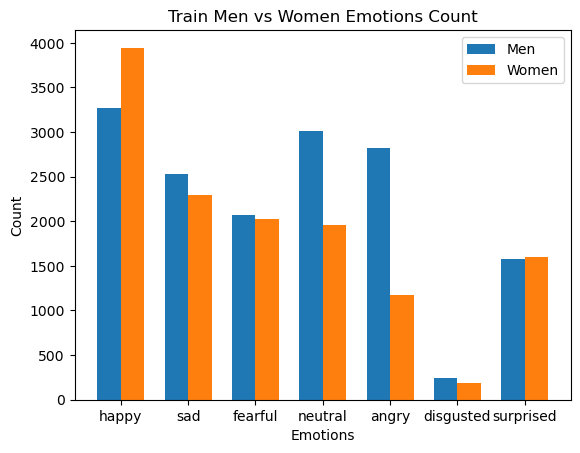

In [25]:
# Define the test men and women count arrays
trainMenCount = [3270, 2530, 2071, 3007, 2818, 246, 1576]
trainFemaleCount = [3945, 2300, 2026, 1958, 1177, 190, 1595]



# Define the width of the bars
bar_width = 0.35

# Define the x-axis positions for the bars
x = range(len(emotions))

# Plotting the bars for test men count
plt.bar(x, trainMenCount, width=bar_width, label='Men')

# Plotting the bars for test female count
plt.bar([i + bar_width for i in x], trainFemaleCount, width=bar_width, label='Women')

# Adding labels and title
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Train Men vs Women Emotions Count')
plt.xticks([i + bar_width/2 for i in x], emotions)
plt.legend()

# Display the plot
plt.show()